In [89]:
import pandas as pd
import os
from pgtools.maf_parser import parse_maf, MAF
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [6]:
csv_dir = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
csv_name = "scaf_lens.csv"

In [3]:
for dataset in os.listdir(csv_dir):
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        print(f)

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
scaf_lens.csv
klebsiella_subset
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
scaf_lens.csv
GPSC_subset
scaf_lens.csv


In [26]:
all_lens = {}
for dataset in os.listdir(csv_dir):
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        df = pd.read_csv(os.path.join(csv_dir, dataset, f))
        lens = df["Len"].to_numpy()
        all_lens[datasets_mapping(dataset)] = lens

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
klebsiella_subset
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
GPSC_subset


In [7]:
def datasets_mapping(x):
    if x.startswith("sim"):
        x= x.replace("sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1", "E. coli ")
    else:
        x= x.replace("_subset", "")
        x= x.replace("GPSC", "Pneumococcus")
        x = x.replace("klebsiella", "Klebsiella")
    return x.strip().replace("_","")

In [8]:
dataset = "klebsiella_subset"

In [9]:
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))

In [10]:
df

,Contig,Len
0,5235_5_12.contig00001,64326
1,5235_5_12.contig00002,60612
2,5235_5_12.contig00003,53131
3,5235_5_12.contig00004,42928
4,5235_5_12.contig00005,40521
...,...,...
15603,5235_6_6.contig01171,56
15604,5235_6_6.contig01172,56
15605,5235_6_6.contig01173,56
15606,5235_6_6.contig01174,56


In [11]:
lens = df["Len"].to_numpy()

In [13]:
lens

array([64326, 60612, 53131, ...,    56,    56,    56])

In [14]:
max(lens)

520083

In [15]:
from collections import Counter

In [16]:
len_coutns = dict(Counter(lens))

In [17]:
len_coutns

{64326: 1,
 60612: 1,
 53131: 1,
 42928: 1,
 40521: 1,
 40109: 1,
 36923: 1,
 36600: 1,
 36365: 1,
 35201: 1,
 33934: 1,
 33337: 1,
 32855: 1,
 32199: 1,
 31282: 1,
 30241: 1,
 29843: 1,
 29837: 1,
 29361: 1,
 29277: 1,
 29044: 1,
 29029: 1,
 28749: 1,
 28569: 1,
 28070: 1,
 27720: 2,
 27475: 1,
 27334: 1,
 26878: 1,
 26800: 1,
 26180: 1,
 25981: 1,
 25936: 1,
 25861: 1,
 25728: 1,
 25560: 1,
 24837: 1,
 24745: 1,
 24630: 1,
 24407: 1,
 23843: 1,
 23483: 1,
 23383: 1,
 23309: 1,
 23298: 1,
 23036: 1,
 23014: 2,
 22992: 1,
 22778: 1,
 22270: 1,
 22038: 1,
 21540: 1,
 21362: 1,
 21266: 1,
 20991: 2,
 20926: 1,
 20875: 1,
 20831: 1,
 20094: 1,
 20029: 1,
 19988: 1,
 19909: 1,
 19831: 1,
 19771: 1,
 19491: 1,
 19465: 2,
 19182: 1,
 19005: 2,
 18839: 1,
 18761: 1,
 18618: 2,
 18571: 1,
 18516: 1,
 18495: 1,
 18337: 1,
 18310: 1,
 18033: 1,
 17852: 1,
 17797: 1,
 17502: 1,
 17430: 1,
 17410: 1,
 17195: 1,
 17189: 1,
 17047: 1,
 16879: 1,
 16781: 1,
 16645: 1,
 16614: 2,
 16357: 1,
 16294: 1,

<Axes: ylabel='Count'>

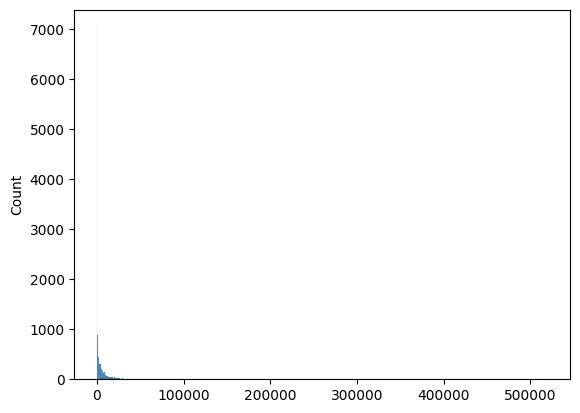

In [12]:

sns.histplot(lens)


In [29]:
datasets = sorted(list(all_lens.keys()))

In [30]:
datasets

['E. coli',
 'E. coli contaminated',
 'E. coli fragmented',
 'Klebsiella',
 'Pneumococcus']

In [27]:
all_lens

{'E. coli fragmented': array([68136, 67305, 61789, ...,    79,    78,    78]),
 'E. coli contaminated': array([250972, 218323, 154585, ...,     79,     78,     78]),
 'Klebsiella': array([64326, 60612, 53131, ...,    56,    56,    56]),
 'E. coli': array([250943, 246775, 220002, ...,     57,     56,     56]),
 'Pneumococcus': array([393383, 313001, 200830, ...,    378,    373,    306])}

In [39]:
lens = []
for i in all_lens.values():
    lens += list(i)
max(lens)

520083

In [66]:
datasets

['E. coli',
 'E. coli contaminated',
 'E. coli fragmented',
 'Klebsiella',
 'Pneumococcus']

In [82]:
datasets=['E. coli',
 'Pneumococcus',
 'E. coli fragmented',
 'Klebsiella',
 'E. coli contaminated',
]

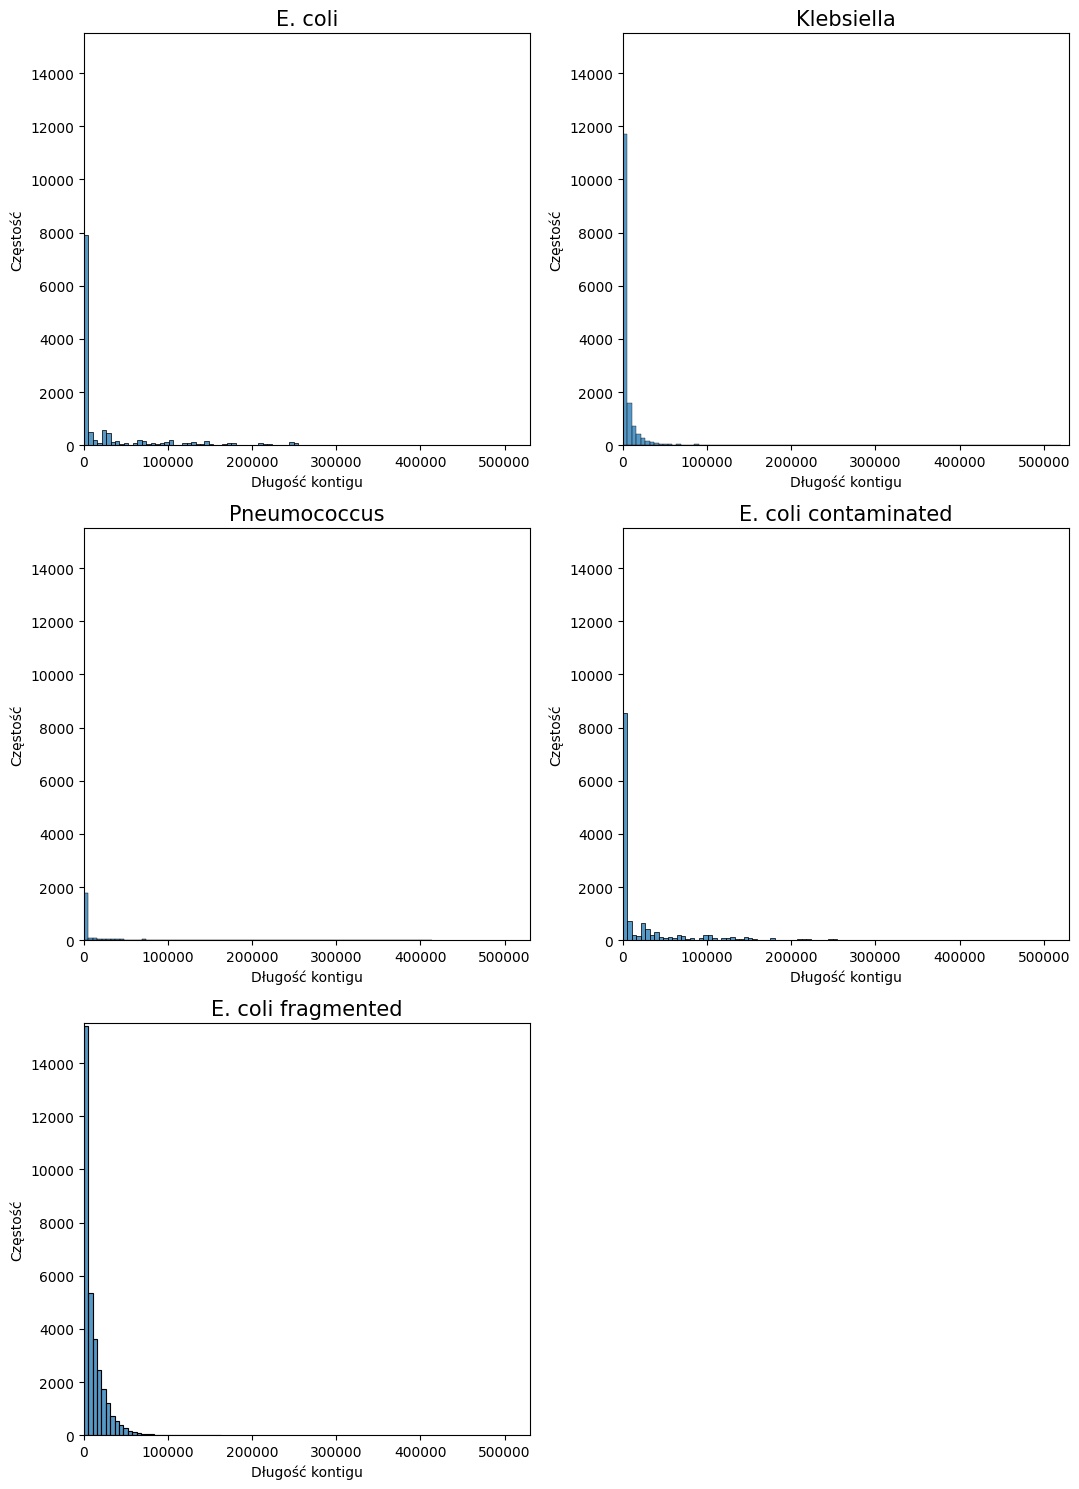

In [423]:
fig, axes = plt.subplots(3,2,figsize=(11, 15))
# fig.s
for k in range(5):
    dataset = datasets[k]
    i = k % 2
    j = k % 3
    sns.histplot(all_lens[dataset], ax=axes[j, i], bins=50, binwidth = 530000*0.01)
    axes[j, i].set_title(dataset, fontsize=15)
    axes[j, i].set_xlabel("Długość kontigu", fontsize=10)
    axes[j, i].set_ylabel("Częstość", fontsize=10)
    axes[j, i].set(xlim=(0,530000))
    axes[j, i].set(ylim=(0,15500))

# plt.show()
fig.tight_layout()

axes[2, 1].axis("off")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.png")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.svg")

In [93]:
round(9543, -2)

9500

In [98]:
all_lens_rounded = {dataset: [round(i, -1) for i in lens] for dataset, lens in all_lens.items()}

In [100]:
for dataset, lens in all_lens_rounded.items():
    print(dataset)
    print(max(lens))
    print(min(lens))
    print(np.median(lens))
    print(np.mean(lens))

    print("-"*40)

E. coli fragmented
162700
80
5930.0
10762.353506541824
----------------------------------------
E. coli contaminated
254860
80
800.0
25389.565597031215
----------------------------------------
Klebsiella
520080
60
840.0
7520.442721681189
----------------------------------------
E. coli
255100
60
670.0
28143.58271865121
----------------------------------------
Pneumococcus
413790
290
480.0
18426.51284109149
----------------------------------------


In [111]:
print("Średnie długości contigów wchodzących w skład genomów poszczególnych datasetów:")
columns = ["Dataset", "Liczba wszystkich kontigów", ""]
for dataset in sorted(list(all_lens.keys())):
    lens = all_lens[dataset]
    print(f"{dataset}: liczba wszystkich scaffoldów: {len(lens)}, średnia długość {np.mean(lens):.0f}")
    # print(max(lens))
    # print(min(lens))
    # print(np.median(lens))
    # print(np.mean(lens))

    # print("-"*40)

Średnie długości contigów wchodzących w skład genomów poszczególnych datasetów:
E. coli: liczba wszystkich scaffoldów: 12337, średnia długość 28144
E. coli contaminated: liczba wszystkich scaffoldów: 13743, średnia długość 25389
E. coli fragmented: liczba wszystkich scaffoldów: 32254, średnia długość 10762
Klebsiella: liczba wszystkich scaffoldów: 15608, średnia długość 7520
Pneumococcus: liczba wszystkich scaffoldów: 2492, średnia długość 18427


In [117]:
dataset="klebsiella_subset"
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])

In [126]:
df.groupby(by=["Genome"])["Len"].mean().mean().astype("int")

11384

In [127]:
df.groupby(by=["Genome"])["Len"].count().mean().astype("int")

780

In [136]:
cols = ["Dataset", "Średnia liczba kontigów w genomie", "Średnia średniej długości kontigu w genomie", "Średnia długość wszystkich kontigów w datasecie"]
data = []
for dataset in os.listdir(csv_dir):
    if "." in dataset:
        continue
    df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
    df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])
    data.append([datasets_mapping(dataset), df.groupby(by=["Genome"])["Len"].count().mean().astype("int"), df.groupby(by=["Genome"])["Len"].mean().mean().astype("int"), df["Len"].mean().astype("int")])

In [137]:
data

[['E. coli fragmented', 322, 10769, 10762],
 ['E. coli contaminated', 137, 25449, 25389],
 ['Klebsiella', 780, 11384, 7520],
 ['E. coli', 123, 28250, 28143],
 ['Pneumococcus', 124, 36545, 18426]]

In [141]:
df_basic = pd.DataFrame(columns=cols, data=data)
df_basic = df_basic.sort_values(["Dataset"])

In [139]:
df_basic

,Dataset,Średnia liczba kontigów w genomie,Średnia średniej długości kontigu w genomie,Średnia długość wszystkich kontigów w datasecie
0,E. coli fragmented,322,10769,10762
1,E. coli contaminated,137,25449,25389
2,Klebsiella,780,11384,7520
3,E. coli,123,28250,28143
4,Pneumococcus,124,36545,18426


In [142]:
df_basic.to_csv("/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/basic_dataset_stats.csv", index=False)

### Contig (genomes?) coverage

In [146]:
cont_lens_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/contig_lens_in_model/"
scaff_lens = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
cont_csv_name = "scaff_cont_lens.csv"
all_lens_csv = "scaf_lens.csv"

In [301]:
dataset = "GPSC_subset"
model="cactus"

In [355]:
df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))
df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))

In [356]:
df_cont_lens

,Contig,sum of seq lens in model
0,22667_7_131.ERS1699020_SC_contig000004,62859
1,Anc0.Anc0refChr36_0,29
2,22841_3_158.ERS1699832_SC_contig000010,79213
3,22841_3_7.ERS1699673_SC_contig000005,84271
4,17794_8_81.ERS719881_SC_contig000001,204228
...,...,...
1254,Anc0.Anc0refChr223_26,389
1255,17794_8_81.ERS719881_SC_contig000195,389
1256,Anc0.Anc0refChr6_26,389
1257,17794_8_81.ERS719881_SC_contig000196,389


In [357]:
df_lens

,Contig,Len
0,17870_7_11.ERS725493_SC_contig000001,393383
1,17870_7_11.ERS725493_SC_contig000002,313001
2,17870_7_11.ERS725493_SC_contig000003,200830
3,17870_7_11.ERS725493_SC_contig000004,178059
4,17870_7_11.ERS725493_SC_contig000005,158966
...,...,...
2487,22027_1_155._SC_contig000049,421
2488,22027_1_155._SC_contig000050,399
2489,22027_1_155._SC_contig000051,378
2490,22027_1_155._SC_contig000052,373


In [358]:
df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")

In [359]:
df_cov

,Contig,Len,sum of seq lens in model
0,17870_7_11.ERS725493_SC_contig000001,393383,NaN
1,17870_7_11.ERS725493_SC_contig000002,313001,NaN
2,17870_7_11.ERS725493_SC_contig000003,200830,127122.0
3,17870_7_11.ERS725493_SC_contig000004,178059,NaN
4,17870_7_11.ERS725493_SC_contig000005,158966,NaN
...,...,...,...
2487,22027_1_155._SC_contig000049,421,NaN
2488,22027_1_155._SC_contig000050,399,NaN
2489,22027_1_155._SC_contig000051,378,NaN
2490,22027_1_155._SC_contig000052,373,NaN


In [360]:
df_cov["sum of seq lens in model"].value_counts()

sum of seq lens in model
326.0       11
338.0        7
372.0        7
322.0        7
329.0        7
            ..
109961.0     1
119030.0     1
127289.0     1
130869.0     1
2772.0       1
Name: count, Length: 562, dtype: int64

In [ ]:
df_cov[]

In [365]:
df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
df_cov

,Contig,Len,sum of seq lens in model,Coverage,Genome
0,17870_7_11.ERS725493_SC_contig000001,393383,0.0,0.000000,17870_7_11
1,17870_7_11.ERS725493_SC_contig000002,313001,0.0,0.000000,17870_7_11
2,17870_7_11.ERS725493_SC_contig000003,200830,127122.0,0.632983,17870_7_11
3,17870_7_11.ERS725493_SC_contig000004,178059,0.0,0.000000,17870_7_11
4,17870_7_11.ERS725493_SC_contig000005,158966,0.0,0.000000,17870_7_11
...,...,...,...,...,...
2487,22027_1_155._SC_contig000049,421,0.0,0.000000,22027_1_155
2488,22027_1_155._SC_contig000050,399,0.0,0.000000,22027_1_155
2489,22027_1_155._SC_contig000051,378,0.0,0.000000,22027_1_155
2490,22027_1_155._SC_contig000052,373,0.0,0.000000,22027_1_155


In [ ]:
df_cov["Coverage"].

In [177]:
df_cov_flt = df_cov[df_cov["Len"] > 100]
df_cov_flt

,Contig,Len,sum of seq lens in model,Coverage,Genome
0,5235_5_12.contig00001,64326,64361.0,1.0,5235_5_12
1,5235_5_12.contig00002,60612,60640.0,1.0,5235_5_12
2,5235_5_12.contig00003,53131,53152.0,1.0,5235_5_12
3,5235_5_12.contig00004,42928,42938.0,1.0,5235_5_12
4,5235_5_12.contig00005,40521,40545.0,1.0,5235_5_12
...,...,...,...,...,...
15472,5235_6_6.contig01040,102,0.0,0.0,5235_6_6
15473,5235_6_6.contig01041,101,0.0,0.0,5235_6_6
15474,5235_6_6.contig01042,101,0.0,0.0,5235_6_6
15475,5235_6_6.contig01043,101,0.0,0.0,5235_6_6


In [366]:
df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()

In [367]:
df_genomes_cvg

,Len,sum of seq lens in model
Genome,,
14520_5_48,2282967,1299291.0
15841_4_17,2286137,911088.0
15841_4_38,2301116,728422.0
17138_5_34,2285979,986760.0
17794_8_81,2421082,2420555.0
17870_7_102,2285521,815246.0
17870_7_11,2302107,463457.0
17870_7_77,2285822,495436.0
18090_1_123,2292876,644135.0


In [368]:
df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

In [369]:
df_genomes_cvg

,Len,sum of seq lens in model,Coverage
Genome,,,
14520_5_48,2282967,1299291.0,0.569124
15841_4_17,2286137,911088.0,0.398527
15841_4_38,2301116,728422.0,0.316552
17138_5_34,2285979,986760.0,0.431658
17794_8_81,2421082,2420555.0,0.999782
17870_7_102,2285521,815246.0,0.356700
17870_7_11,2302107,463457.0,0.201319
17870_7_77,2285822,495436.0,0.216743
18090_1_123,2292876,644135.0,0.280929


In [254]:
df_cov["Len rounded"] = df_cov["Len"].round(-2)

In [255]:
df_cov

,Contig,Len,sum of seq lens in model,Coverage,Genome,Len rounded
0,5235_5_12.contig00001,64326,64361.0,1.0,5235_5_12,64300
1,5235_5_12.contig00002,60612,60640.0,1.0,5235_5_12,60600
2,5235_5_12.contig00003,53131,53152.0,1.0,5235_5_12,53100
3,5235_5_12.contig00004,42928,42938.0,1.0,5235_5_12,42900
4,5235_5_12.contig00005,40521,40545.0,1.0,5235_5_12,40500
...,...,...,...,...,...,...
15603,5235_6_6.contig01171,56,0.0,0.0,5235_6_6,100
15604,5235_6_6.contig01172,56,0.0,0.0,5235_6_6,100
15605,5235_6_6.contig01173,56,0.0,0.0,5235_6_6,100
15606,5235_6_6.contig01174,56,0.0,0.0,5235_6_6,100


In [372]:
df_cov["Len rounded"] = df_cov["Len"].round(-2)
df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()

# df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)

In [373]:
df_cov.groupby("Genome")[["Len rounded"]].agg(pd.Series.mode)

ValueError: Must produce aggregated value

In [374]:
df_genomes_cvg

,Len,sum of seq lens in model,Coverage,Mean scaff len,Max scaff len,Median scaff len,No. of scaffs
Genome,,,,,,,
17794_8_81,2421082,2420555.0,0.999782,5764,204105,380.0,420
14520_5_48,2282967,1299291.0,0.569124,34074,299012,11144.0,67
17138_5_34,2285979,986760.0,0.431658,31750,123109,21774.0,72
22667_7_131,2286193,933727.0,0.408420,34122,173691,23130.0,67
21053_8_138,2297142,931800.0,0.405634,41766,256706,19298.0,55
15841_4_17,2286137,911088.0,0.398527,9770,199775,418.0,234
22841_3_158,2294870,866730.0,0.377682,40980,413792,15588.0,56
17870_7_102,2285521,815246.0,0.356700,43952,222230,14126.0,52
19084_7_49,2282905,807369.0,0.353659,34073,215367,21520.0,67


In [278]:
df_genomes_cvg.index

Index(['5235_5_12', '5235_6_6', '5235_6_12', '5235_2_1', '5235_5_4',
       '5235_6_11', '5235_1_4', '5299_1_3', '5299_7_4', '5193_1_5', '5151_2_6',
       '5193_8_2', '5197_7_4', '5193_2_6', '5197_2_1', '5150_3_5', '5150_1_3',
       '5151_6_6', '5197_7_5', '5150_2_2'],
      dtype='object', name='Genome')

In [267]:
genomes = df_cov["Genome"].unique()

In [282]:
for genome in df_genomes_cvg.index:
    df = df_cov[df_cov["Genome"] == genome]
    print(genome)
    print("genome cvg: " + str(df_genomes_cvg.at[genome,"Coverage"]))
    print(df["Len rounded"].value_counts().head(n=7))

5235_5_12
genome cvg: 1.0
Len rounded
100    301
200     90
300     70
400     34
500     34
800     25
700     24
Name: count, dtype: int64
5235_6_6
genome cvg: 0.5006937111398886
Len rounded
100    159
300     51
200     42
500     32
400     31
600     26
800     25
Name: count, dtype: int64
5235_6_12
genome cvg: 0.45578484253114027
Len rounded
100     363
200      33
300      33
400      25
600      19
900      16
1300     16
Name: count, dtype: int64
5235_2_1
genome cvg: 0.43780399525381425
Len rounded
100     183
200      38
300      38
400      22
900      19
1300     16
1000     16
Name: count, dtype: int64
5235_5_4
genome cvg: 0.4332327716636614
Len rounded
100     62
200     59
300     43
400     37
1400    23
500     22
700     22
Name: count, dtype: int64
5235_6_11
genome cvg: 0.41321934421599377
Len rounded
100     120
200      31
300      31
400      22
900      18
1100     18
1500     14
Name: count, dtype: int64
5235_1_4
genome cvg: 0.40032210730957846
Len rounded
100  

In [264]:
df_genomes_cvg

,Len,sum of seq lens in model,Coverage,Mean scaff len,Max scaff len,Median scaff len category,Median scaff len
Genome,,,,,,,
5235_5_12,5893827,5895809.0,1.000000,4376,64326,NaN,1284.0
5235_6_6,5798523,2903284.0,0.500694,4935,86511,NaN,2333.0
5235_6_12,5859857,2670834.0,0.455785,4745,73498,NaN,1643.0
5235_2_1,5784013,2532264.0,0.437804,5370,53881,NaN,2444.0
5235_5_4,6031125,2612881.0,0.433233,5569,56935,NaN,2916.0
5235_6_11,5799501,2396466.0,0.413219,6531,55732,NaN,3287.0
5235_1_4,5935910,2376276.0,0.400322,3781,49249,NaN,2066.0
5299_1_3,5780659,1186627.0,0.205275,11095,133092,NaN,5314.0
5299_7_4,5845238,911196.0,0.155887,3089,110709,NaN,61.0


In [233]:
df_cov["Len"].round(-4)

0        60000
1        60000
2        50000
3        40000
4        40000
         ...  
15603        0
15604        0
15605        0
15606        0
15607        0
Name: Len, Length: 15608, dtype: int64

In [205]:
df_genomes_cvg.to_csv("genome_cvg.csv")
df_cov_flt.to_csv("scaff_cvg.csv")

In [380]:
summaries_dir = "/home/pampuch/studia/magisterka/final_summaries/"

cont_lens_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/contig_lens_in_model/"
scaff_lens = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
cont_csv_name = "scaff_cont_lens.csv"
all_lens_csv = "scaf_lens.csv"

summaries_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/csv_summaries"
scaff_res_csv = "scaff_cov_summary.csv"
genomes_res_csv = "genomes_cov_summary.csv"

def summarise_dataset_coverages(dataset):
    for model in os.listdir(cont_lens_dir):
        print(model)
        df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))

            
        df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, all_lens_csv))
        
        if dataset == "GPSC_subset" and model != "panaroo":       
            df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))
        # print(df_lens.head())
        # print(df_cont_lens.head())
        df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")
        df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
        df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
        df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
        df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
        
        df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()
        df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
        df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

        df_cov["Len rounded"] = df_cov["Len"].round(-2)
        df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
        df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
        df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
        df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()
        
        # df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
        df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)
        print(df_genomes_cvg["Coverage"].head())
        df_cov.to_csv(os.path.join(summaries_dir, model, dataset, scaff_res_csv), index=False)
        df_genomes_cvg.to_csv(os.path.join(summaries_dir, model, dataset, genomes_res_csv), index=False)
summarise_dataset_coverages("klebsiella_subset")

panaroo
Genome
5151_6_6    0.868531
5193_1_5    0.849368
5193_2_6    0.845501
5197_2_1    0.843613
5299_1_3    0.843571
Name: Coverage, dtype: float64
panaroo_compl
Genome
5151_6_6    0.952873
5193_1_5    0.936231
5150_2_2    0.933913
5193_2_6    0.928122
5197_2_1    0.924858
Name: Coverage, dtype: float64
cactus
Genome
5235_5_12    1.000000
5235_6_6     0.500694
5235_6_12    0.455785
5235_2_1     0.437804
5235_5_4     0.433233
Name: Coverage, dtype: float64


In [381]:
for dataset in os.listdir(scaff_lens):
    if "." not in dataset:
        summarise_dataset_coverages(dataset)

panaroo
Genome
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_21    0.813541
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_22    0.813441
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_30    0.813172
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_20    0.813150
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_12    0.813030
Name: Coverage, dtype: float64
panaroo_compl
Genome
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_30    0.905539
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_21    0.905254
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_17    0.902906
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_27    0.902828
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_20    0.902637
Name: Coverage, dtype: float64
cactus
Genome
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_99    1.000000
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_74    0.463104
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_86    0.460608
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_50    0.456344
pan_sim_gr_1e-11_lr_1e-12_mu_1e-15_iso_8     0.449189
Name: Coverage, dtype: float64
panaroo
Genome
pan_sim_gr_1e-11_lr_1e-12_mu_1e-

In [382]:
for dataset in os.listdir(scaff_lens):
    if "." in dataset:
        continue
    print(dataset)
    for model in os.listdir(cont_lens_dir):
        if "." in model:
            continue
        print(model)
        for f in os.listdir(os.path.join(summaries_dir, model, dataset)):

            f_path = os.path.join(summaries_dir, model, dataset, f)
            df = pd.read_csv(f_path)
            print(dataset)
            print(df["Coverage"].mean())

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.5724878917669413
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8077532581182215
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.6274036356060995
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8933529395289652
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.43823047084743216
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.4143351453336534
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.38476432882652756
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.8352082416217825
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.42368484677258766
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.9254518536638848
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.412578011264204
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.918336531375397
klebsiella_subset
panaroo
klebsiella_subs

In [351]:
def summarise_dataset_coverages(dataset):
    for model in os.listdir(cont_lens_dir):
        print(model)
        df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))

            
        df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, all_lens_csv))
        df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")
        if dataset == "GPSC_subset" and model != "panaroo":       
            df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))
        print(df_lens.head())
        print(df_cont_lens.head())
        df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
        df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
        df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
        df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
        
        df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()
        df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
        df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

        df_cov["Len rounded"] = df_cov["Len"].round(-2)
        df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
        df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
        df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
        df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()
        
        # df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
        df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)
        print(df_genomes_cvg.head())
        df_cov.to_csv(os.path.join(summaries_dir, model, dataset, scaff_res_csv), index=False)
        df_genomes_cvg.to_csv(os.path.join(summaries_dir, model, dataset, genomes_res_csv), index=False)

    return df_genomes_cvg, df_cov

df_genomes, df_cov = summarise_dataset_coverages("GPSC_subset")

panaroo
                                        Contig     Len
0  17870_7_11.velvet.ERS725493_SC_contig000001  393383
1  17870_7_11.velvet.ERS725493_SC_contig000002  313001
2  17870_7_11.velvet.ERS725493_SC_contig000003  200830
3  17870_7_11.velvet.ERS725493_SC_contig000004  178059
4  17870_7_11.velvet.ERS725493_SC_contig000005  158966
                                          Contig  sum of seq lens in model
0             22027_1_69.velvet._SC_contig000006                     98210
1  22667_7_131.velvet.ERS1699020_SC_contig000003                    119740
2  22841_3_158.velvet.ERS1699832_SC_contig000004                     91233
3   22841_3_20.velvet.ERS1699686_SC_contig000007                     98689
4    22841_3_7.velvet.ERS1699673_SC_contig000009                     66906
                 Len  sum of seq lens in model  Coverage  Mean scaff len  \
Genome                                                                     
23164_8_137  2282396                 1968067.0  0.862281    

In [352]:
df_genomes

,Len,sum of seq lens in model,Coverage,Mean scaff len,Max scaff len,Median scaff len,No. of scaffs
Genome,,,,,,,
14520_5_48,2282967,0.0,0.0,34074,299012,11144.0,67
15841_4_17,2286137,0.0,0.0,9770,199775,418.0,234
23164_8_137,2282396,0.0,0.0,63400,385873,35024.0,36
22841_3_7,2282345,0.0,0.0,47549,305416,24502.0,48
22841_3_20,2283015,0.0,0.0,48575,270333,13794.0,47
22841_3_158,2294870,0.0,0.0,40980,413792,15588.0,56
22667_7_131,2286193,0.0,0.0,34122,173691,23130.0,67
22027_1_69,2283108,0.0,0.0,46594,271139,23091.0,49
22027_1_155,2285901,0.0,0.0,43130,278778,12986.0,53


In [353]:
df_cov

,Contig,Len,sum of seq lens in model,Coverage,Genome,Len rounded
0,17870_7_11.velvet.ERS725493_SC_contig000001,393383,0.0,0.0,17870_7_11,393400
1,17870_7_11.velvet.ERS725493_SC_contig000002,313001,0.0,0.0,17870_7_11,313000
2,17870_7_11.velvet.ERS725493_SC_contig000003,200830,0.0,0.0,17870_7_11,200800
3,17870_7_11.velvet.ERS725493_SC_contig000004,178059,0.0,0.0,17870_7_11,178100
4,17870_7_11.velvet.ERS725493_SC_contig000005,158966,0.0,0.0,17870_7_11,159000
...,...,...,...,...,...,...
2487,22027_1_155.velvet._SC_contig000049,421,0.0,0.0,22027_1_155,400
2488,22027_1_155.velvet._SC_contig000050,399,0.0,0.0,22027_1_155,400
2489,22027_1_155.velvet._SC_contig000051,378,0.0,0.0,22027_1_155,400
2490,22027_1_155.velvet._SC_contig000052,373,0.0,0.0,22027_1_155,400


In [354]:
dataset = "GPSC_subset"

### Histogramy pokrycia

Dla każdego datasetu po 3 (panaroo, cactus, panaroo uzupełnione)

In [388]:
cvg_dict = {}
for dataset in os.listdir(scaff_lens):
    
    if "." in dataset:
        continue
    print(dataset)
    dataset_name = datasets_mapping(dataset)
    cvg_dict[dataset_name] = {}
    for model in os.listdir(cont_lens_dir):
        if "." in model:
            continue
        print(model)
        
        for f in os.listdir(os.path.join(summaries_dir, model, dataset)):
            if not f.startswith("genome"):
                continue
            f_path = os.path.join(summaries_dir, model, dataset, f)
            df = pd.read_csv(f_path)
            print(dataset)
            print(df["Coverage"].mean())
            cvg_dict[dataset_name][model] = df["Coverage"].to_numpy()



sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8077532581182215
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8933529395289652
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.4143351453336534
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.8352082416217825
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.9254518536638848
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.918336531375397
klebsiella_subset
panaroo
klebsiella_subset
0.8077184326242278
panaroo_compl
klebsiella_subset
0.8826909023241116
cactus
klebsiella_subset
0.21471684562243626
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.8399943115283734
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.9317783176195775
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.933561279595239
GPSC_subset
panaroo
GPSC_subset
0.8399347252731039
panaro

In [389]:
cvg_dict

{'E. coli fragmented': {'panaroo': array([0.81354092, 0.81344093, 0.81317215, 0.8131504 , 0.81303037,
         0.81299042, 0.81264891, 0.81242372, 0.81237359, 0.81205469,
         0.81177167, 0.81164127, 0.81117368, 0.81114186, 0.81086985,
         0.81064177, 0.81053274, 0.81044742, 0.81042634, 0.81034855,
         0.8103262 , 0.81018974, 0.81006385, 0.80999034, 0.80984311,
         0.80964578, 0.80940754, 0.80930019, 0.80923272, 0.80917736,
         0.80909927, 0.80889333, 0.80884504, 0.80877677, 0.80872956,
         0.80862967, 0.80849321, 0.80831666, 0.80829865, 0.80819252,
         0.80794727, 0.80776469, 0.80768714, 0.80763059, 0.80755736,
         0.80746707, 0.80741122, 0.80738895, 0.80738795, 0.80730478,
         0.8072517 , 0.8072327 , 0.80717157, 0.80716204, 0.80715762,
         0.8071441 , 0.80700897, 0.80696281, 0.80696134, 0.80694407,
         0.8069277 , 0.80688654, 0.80682972, 0.80675068, 0.80670828,
         0.80669807, 0.80665533, 0.80659268, 0.80657999, 0.80645786,
 

In [401]:
datasets = []
model_names = set()
for dataset, models in cvg_dict.items():
    datasets.append(dataset)
    for model, cvg in models.items():
        model_names.add(model)
datasets = sorted(datasets)        

In [402]:
datasets

['E. coli',
 'E. coli contaminated',
 'E. coli fragmented',
 'Klebsiella',
 'Pneumococcus']

In [400]:
model_names

{'cactus', 'panaroo', 'panaroo_compl'}

In [403]:
model_names = ["panaroo","panaroo_compl","cactus"]


In [405]:
dataset = "Klebsiella"

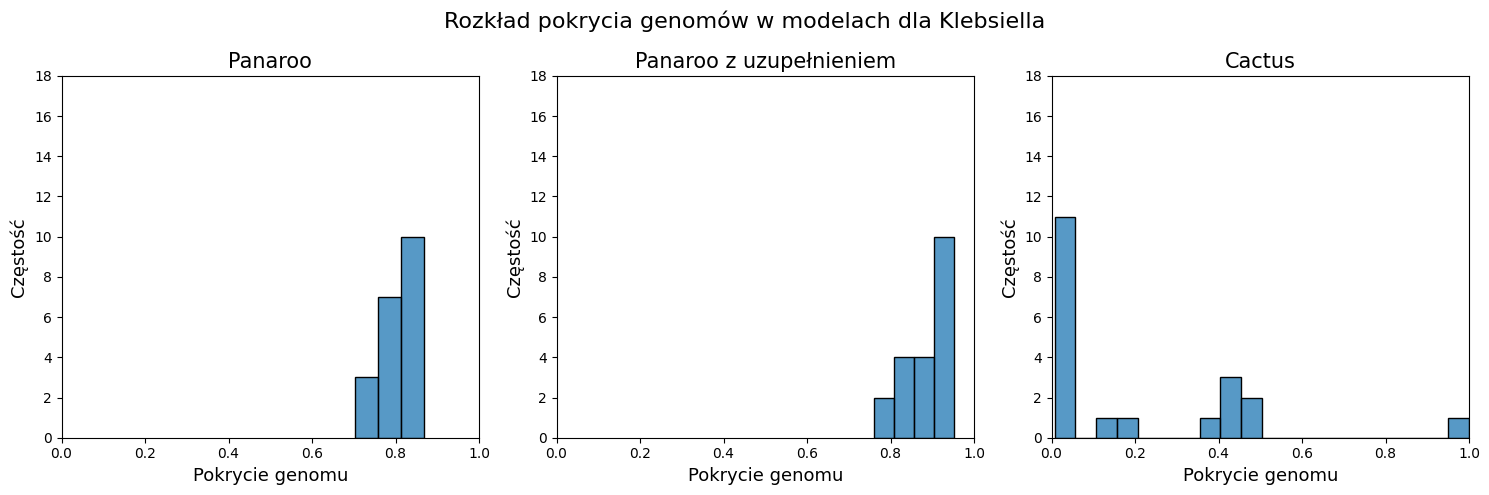

In [433]:
dataset = "Klebsiella"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print()
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.05*1)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,18))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

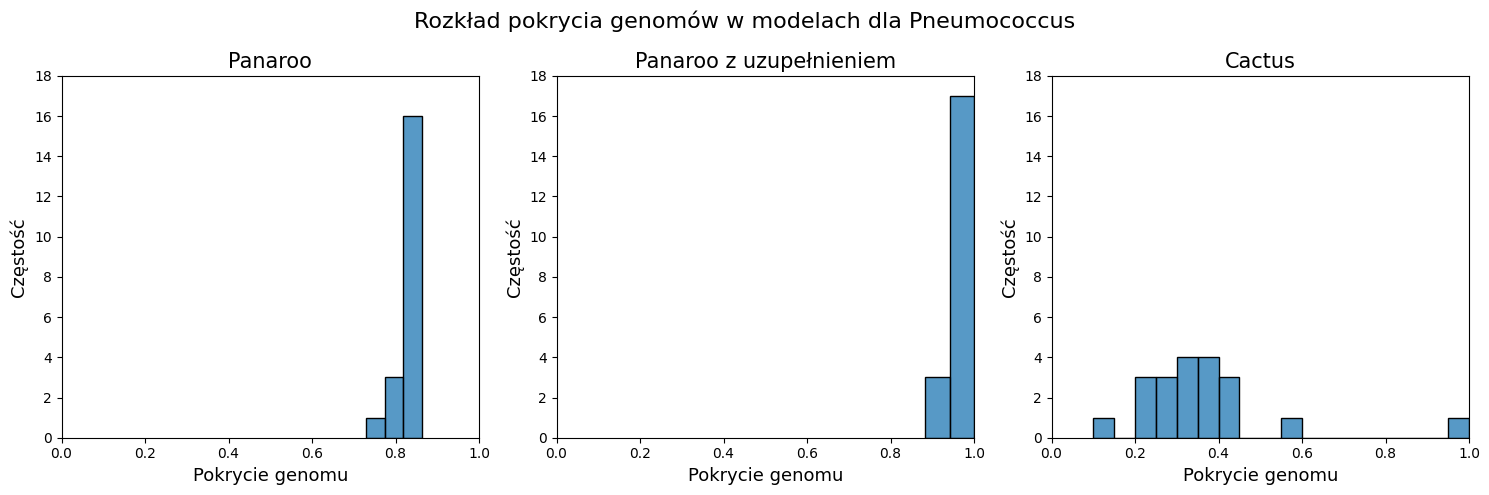

In [436]:
dataset = "Pneumococcus"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print()
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.05*1)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,18))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


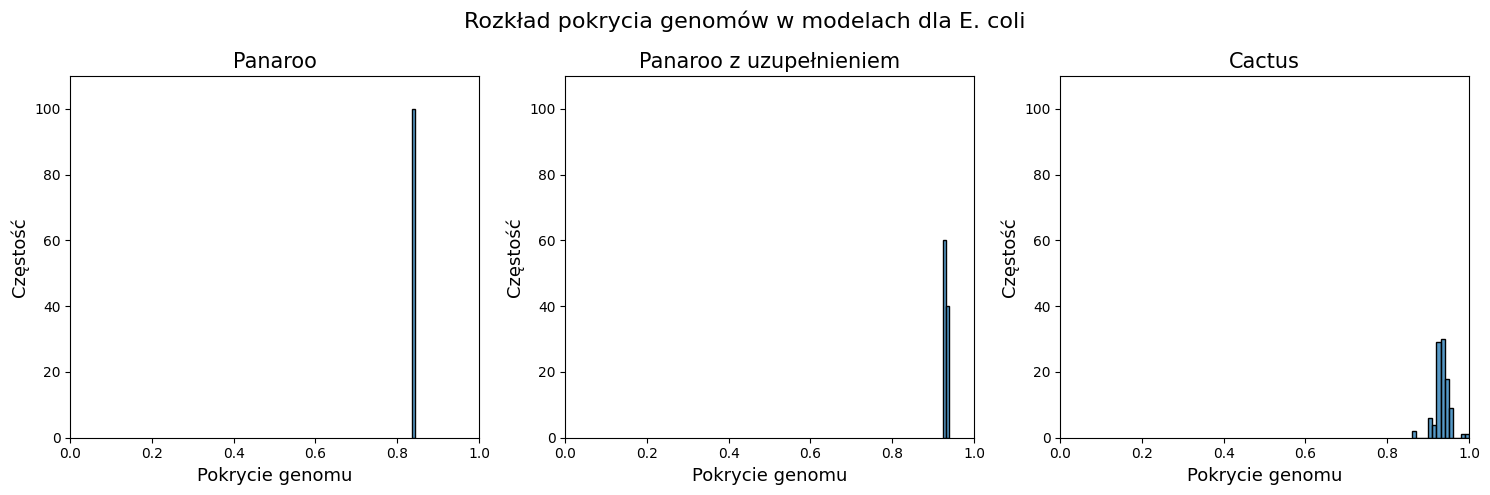

In [456]:
dataset = "E. coli"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


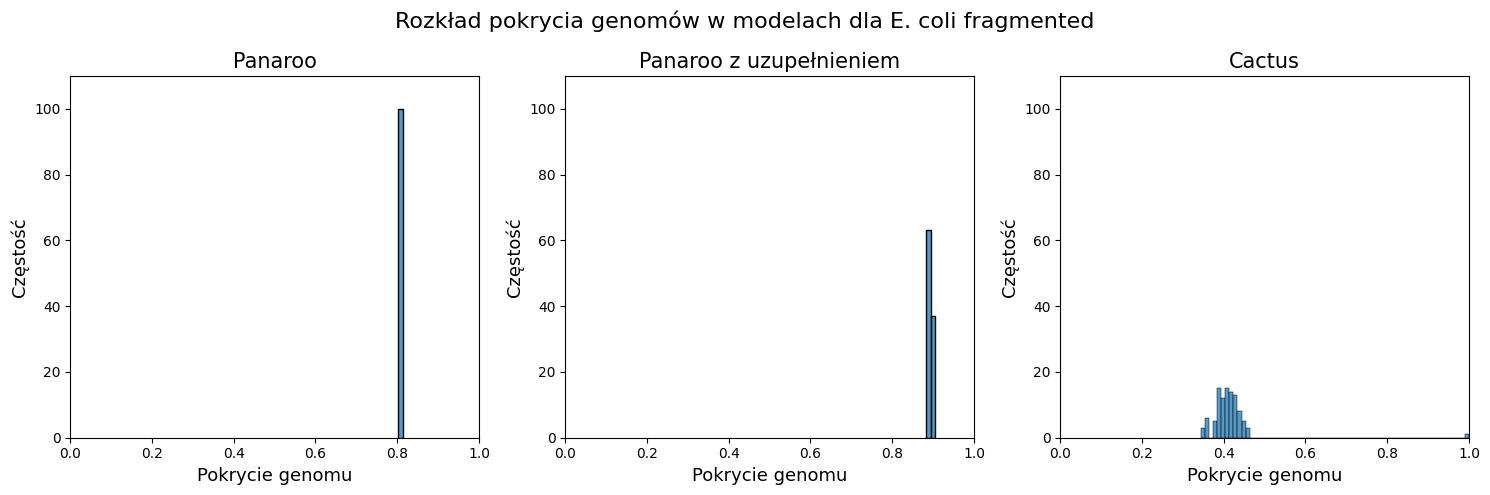

In [457]:
dataset = "E. coli fragmented"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


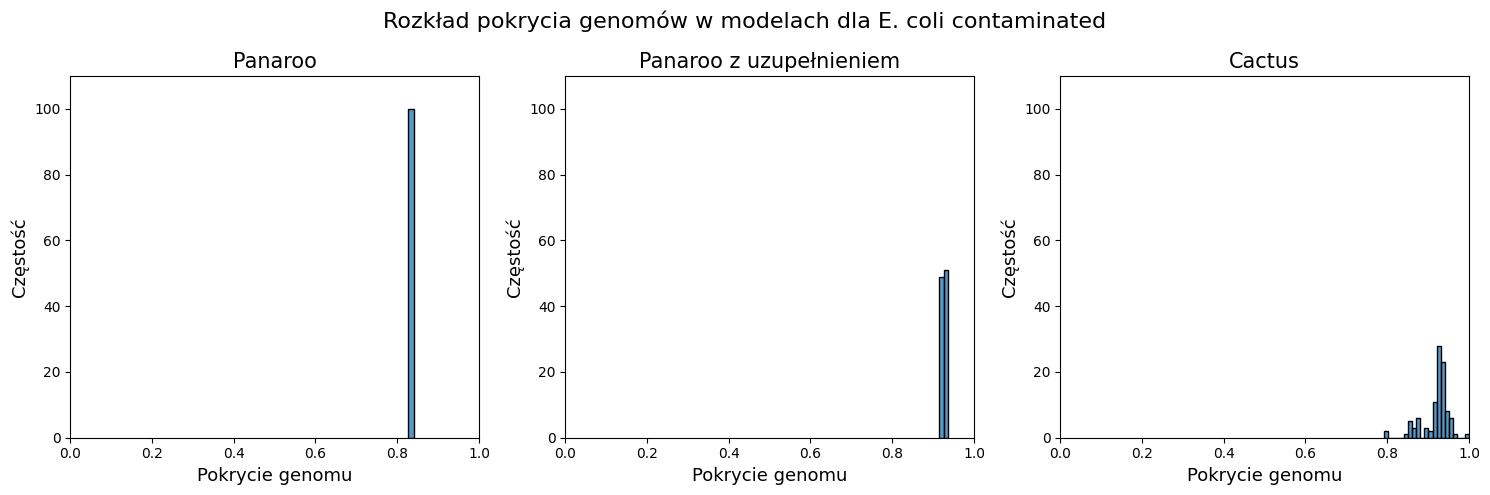

In [458]:
dataset = "E. coli contaminated"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")